# Titanic Survival Prediction:

## Objective:

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.

## Importing the Libraries

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset:

In [2]:
tnc=pd.read_csv(r'C:\Users\mark4\Desktop\Jupyter Notebook\Job Assignment\Codesoft\Task 2_ Titanic Survival Prediction\Titanic Dataset.csv')
tnc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
tnc.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
tnc.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Basic Info:

In [5]:
tnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Missing Values:

In [6]:
tnc.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Distribution:

In [7]:
tnc.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


## Age Column:

In [8]:
a=tnc.Age.unique()
a

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [9]:
a.sort()
a

array([ 0.17,  0.33,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.5 , 12.  , 13.  , 14.  ,
       14.5 , 15.  , 16.  , 17.  , 18.  , 18.5 , 19.  , 20.  , 21.  ,
       22.  , 22.5 , 23.  , 24.  , 25.  , 26.  , 26.5 , 27.  , 28.  ,
       28.5 , 29.  , 30.  , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 ,
       35.  , 36.  , 36.5 , 37.  , 38.  , 38.5 , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  ,
       50.  , 51.  , 53.  , 54.  , 55.  , 57.  , 58.  , 59.  , 60.  ,
       60.5 , 61.  , 62.  , 63.  , 64.  , 67.  , 76.  ,   nan])

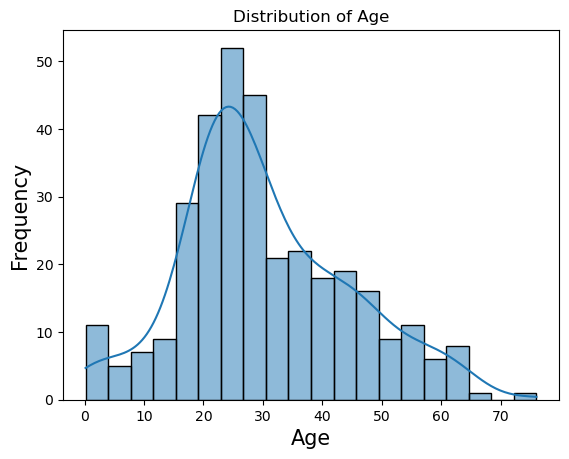

In [10]:
# Distribution of the values in Age Column:

ax=sns.histplot(data=tnc,x='Age',bins=20,kde=True)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Distribution of '+'Age')
plt.show()

In [11]:
# let's create a new dataframe with the existing data in tnc:

tnc1=tnc
tnc1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Let's fill the missing values with the mean value:


tnc1['Age'] = tnc1['Age'].fillna(tnc1['Age'].mean())


In [13]:
tnc1.Age.isna().sum()

0

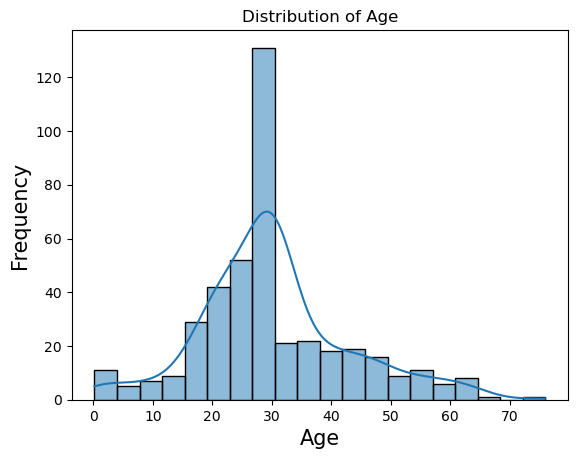

In [14]:
# Distribution of the values in Age Column:

ax=sns.histplot(data=tnc1,x='Age',bins=20,kde=True)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Distribution of '+'Age')
plt.show()

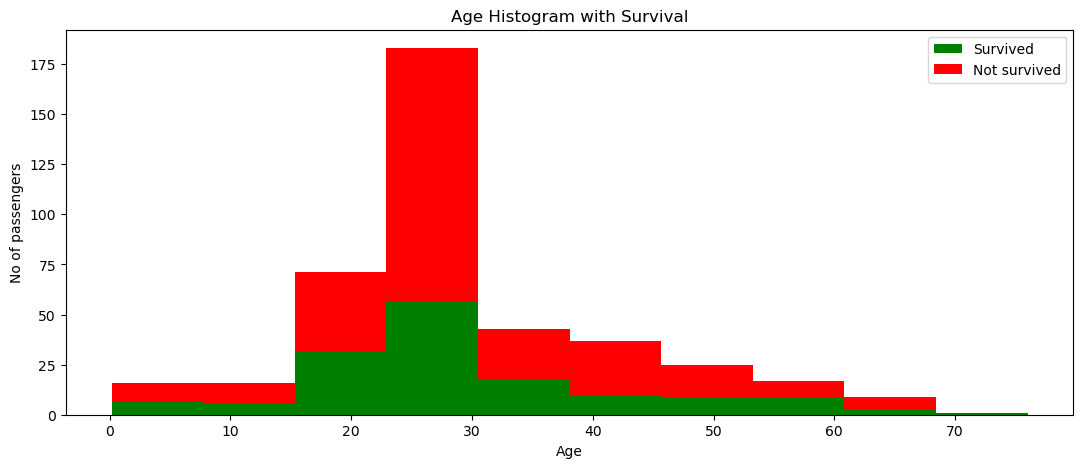

In [15]:
# Let's check the survival with respect to Age:

plt.figure(figsize=(13,5))
plt.hist(x =[tnc1[tnc1['Survived']==1]['Age'],tnc1[tnc1['Survived']==0]['Age']],stacked=True,color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

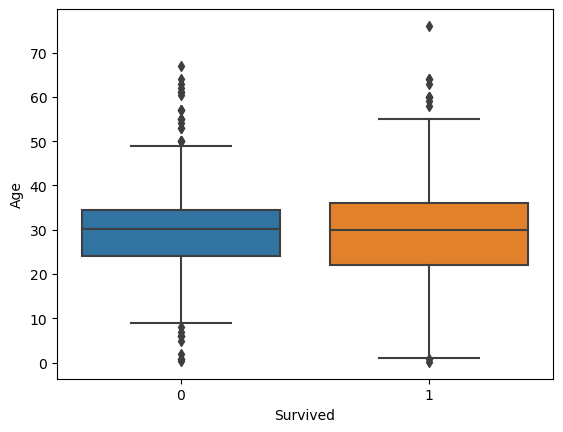

In [16]:
# Distribution of Age according to the passengers who died and survived:

sns.boxplot(x=tnc1.Survived,y=tnc1.Age)
plt.show()

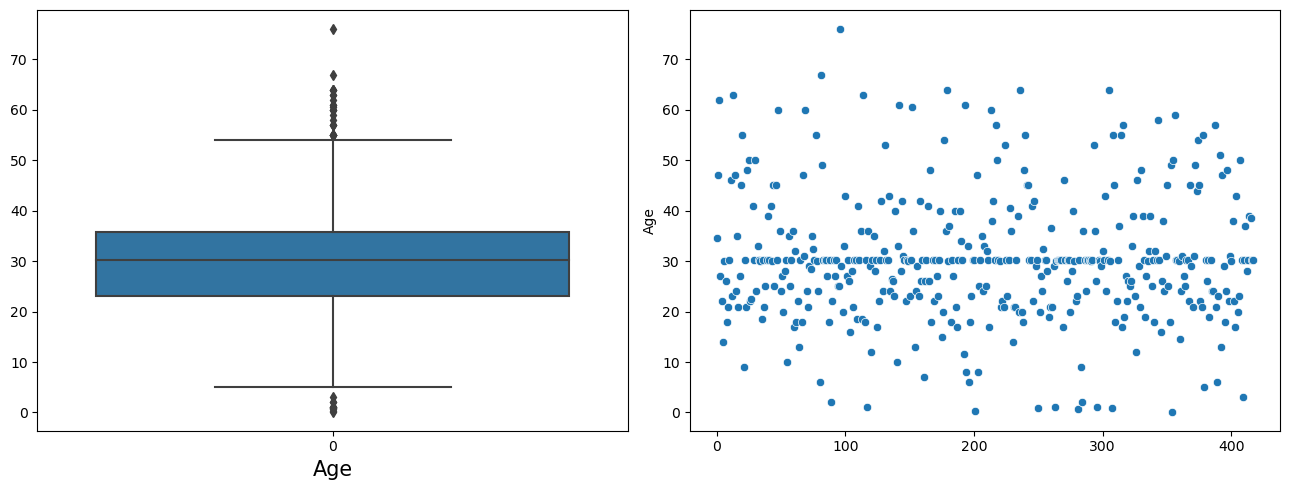

In [17]:
# Let's check for outliers:

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.boxplot(data=tnc1['Age'])
plt.xlabel('Age',fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(y=tnc1.Age,x=tnc1.Age.index)

plt.tight_layout()
plt.show()

* Let's leave the Age column for now.

## Fare Column:

In [18]:
# we have a single null value in Fare column

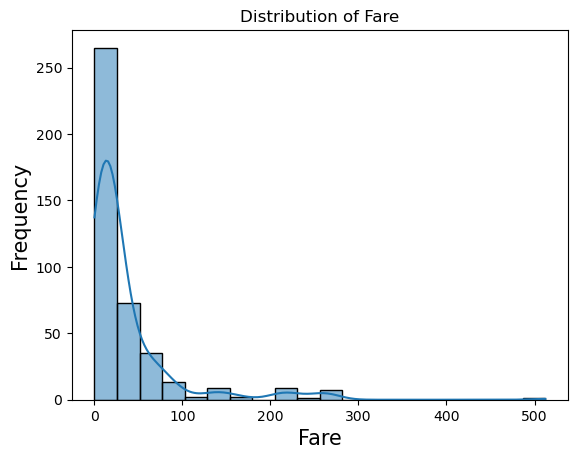

In [19]:
# Distribution of the values in Fare Column:

ax=sns.histplot(data=tnc1,x='Fare',bins=20,kde=True)
plt.xlabel('Fare',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Distribution of '+'Fare')
plt.show()

* There is significant difference between mean and median in Fare column

In [20]:
a=tnc1.Fare.unique()
a.sort()
a

array([  0.    ,   3.1708,   6.4375,   6.4958,   6.95  ,   7.    ,
         7.05  ,   7.225 ,   7.2292,   7.25  ,   7.2833,   7.55  ,
         7.575 ,   7.5792,   7.6292,   7.65  ,   7.7208,   7.725 ,
         7.7333,   7.75  ,   7.775 ,   7.7792,   7.7958,   7.8208,
         7.8292,   7.85  ,   7.8542,   7.8792,   7.8875,   7.8958,
         7.925 ,   8.05  ,   8.1125,   8.5167,   8.6625,   8.7125,
         8.9625,   9.225 ,   9.325 ,   9.35  ,   9.5   ,   9.6875,
        10.5   ,  10.7083,  11.5   ,  12.1833,  12.2875,  12.35  ,
        12.7375,  12.875 ,  13.    ,  13.4167,  13.5   ,  13.775 ,
        13.8583,  13.8625,  13.9   ,  14.1083,  14.4   ,  14.4542,
        14.4583,  14.5   ,  15.0333,  15.0458,  15.1   ,  15.2458,
        15.5   ,  15.55  ,  15.5792,  15.7417,  15.75  ,  15.9   ,
        16.    ,  16.1   ,  16.7   ,  17.4   ,  18.    ,  20.2125,
        20.25  ,  20.575 ,  21.    ,  21.075 ,  21.6792,  22.025 ,
        22.3583,  22.525 ,  23.    ,  23.25  ,  23.45  ,  24.1

In [21]:
# Let's fill the null values in the Fare column with the median values:

tnc1['Fare'] = tnc1['Fare'].fillna(tnc1['Fare'].median())

In [22]:
tnc1.Fare.isna().sum()

0

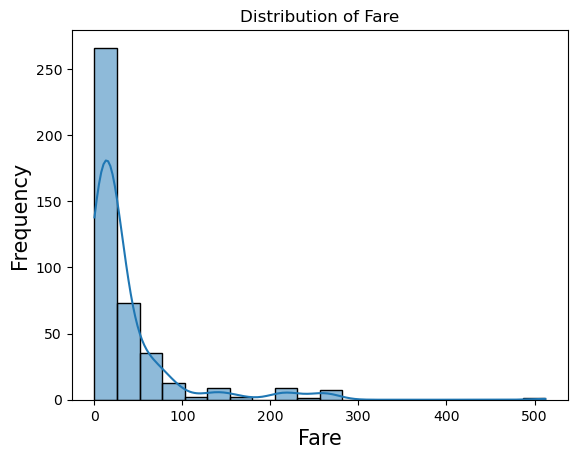

In [23]:
# Distribution of the values in Fare Column:

ax=sns.histplot(data=tnc1,x='Fare',bins=20,kde=True)
plt.xlabel('Fare',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Distribution of '+'Fare')
plt.show()

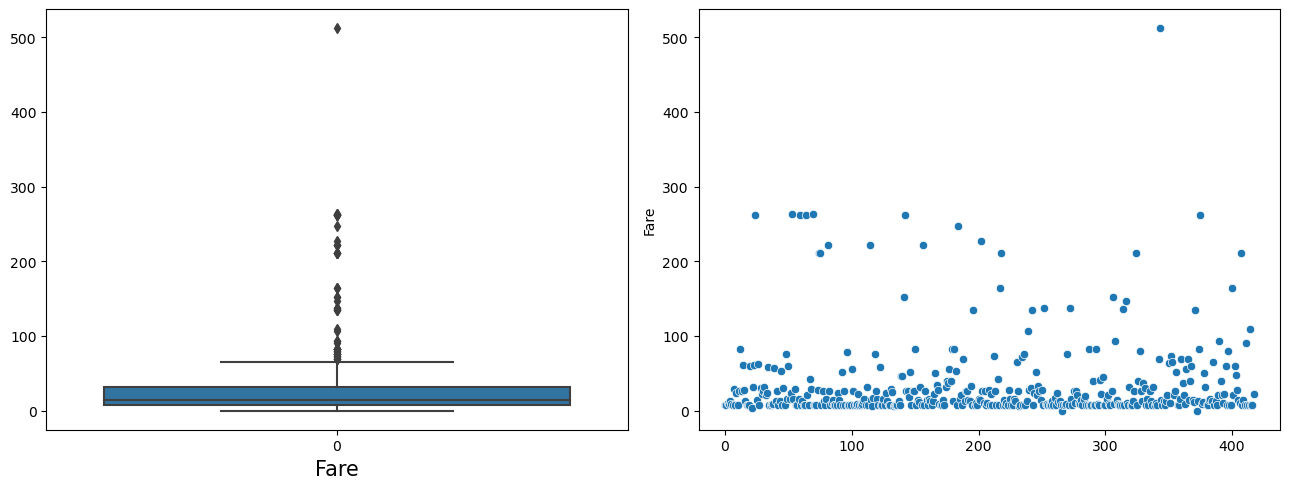

In [24]:
# Let's check for outliers in Fare:


plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.boxplot(data=tnc1['Fare'])
plt.xlabel('Fare',fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(y=tnc1.Fare,x=tnc1.Fare.index)

plt.tight_layout()
plt.show()

In [25]:
# let's cap the outliers upto 300:

tnc1.Fare=np.where(tnc1.Fare>300,300,tnc1.Fare)

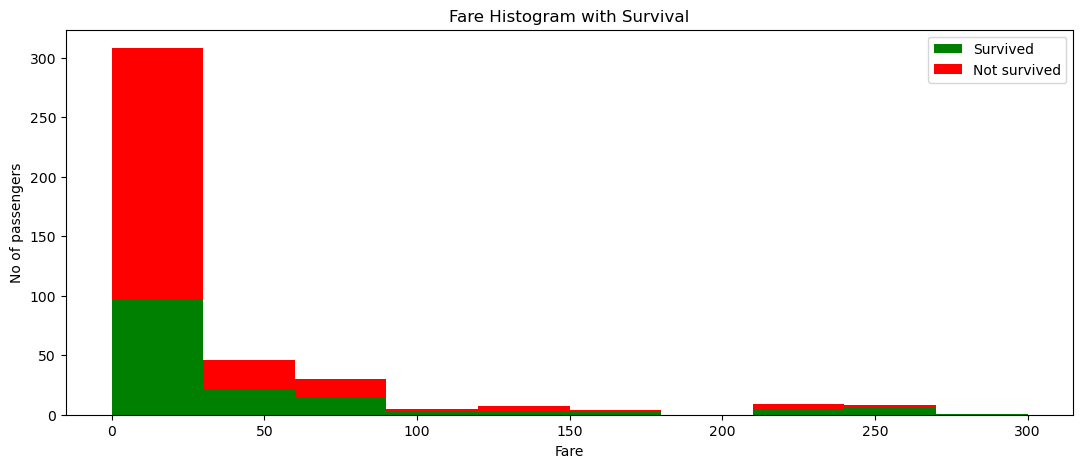

In [26]:
# Let's check the survival with respect to Fare:

plt.figure(figsize=(13,5))
plt.hist(x =[tnc1[tnc1['Survived']==1]['Fare'],tnc1[tnc1['Survived']==0]['Fare']],stacked=True,color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

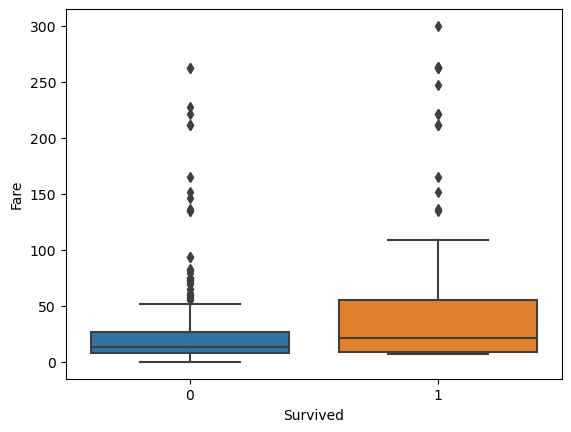

In [27]:
# Distribution of Fare according to the passengers who died and survived:

sns.boxplot(x=tnc1.Survived,y=tnc1.Fare)
plt.show()

## Cabin Column:

In [28]:
tnc1.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

* Let's leave this column for now.

In [29]:
tnc1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
tnc1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
# Let's remove the PassengerID as it will not contribute anything in the prediction:

tnc1.drop('PassengerId',axis=1,inplace=True)

In [32]:
tnc1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Pclass:

In [33]:
tnc1.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [34]:
# Let's check the survival rate according to Pclass:

tnc1.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: Survived, dtype: int64

In [35]:
tnc1.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

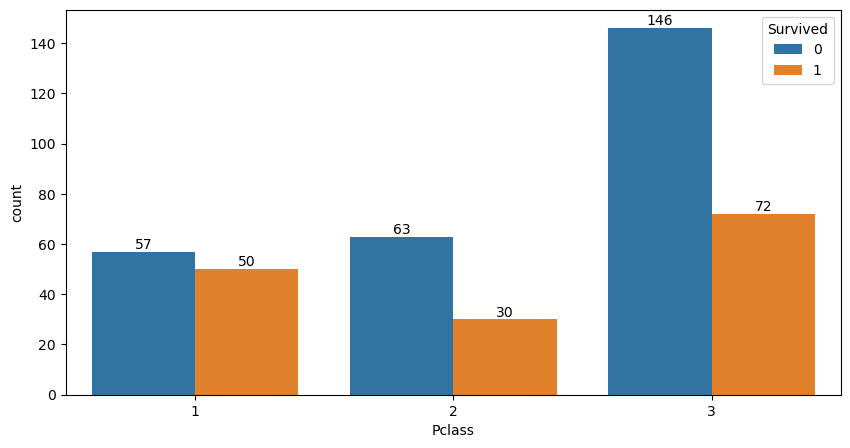

In [36]:
plt.figure(figsize=(10,5),dpi=100)
ax=sns.countplot(x='Pclass',hue='Survived',data=tnc1)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

* We can see that death rate is higher according to Pclass

## Sex Column:

In [37]:
tnc1.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [38]:
# Let's check the survival rate according to Sex of the passenger:

tnc1.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

In [39]:
tnc1[tnc1.Sex=='male']['Survived'].unique()

array([0], dtype=int64)

* So according to the data No male passengers have survived.

In [40]:
# Let's perform one hot encoding in Sex Column:

tnc1=pd.get_dummies(tnc1,columns=['Sex'])
tnc1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,0


## SibSp and Parch:

In [41]:
# SibSp and Parch refers to Sibling, spouse and Parents, Children respectively.

In [42]:
tnc1.SibSp.unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [43]:
tnc1.SibSp.value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [44]:
tnc1.Parch.unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [45]:
tnc1.Parch.value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [46]:
# We can Consider SibSp and Parch as family members
# Let's combine SibSp and Parch together

In [47]:
tnc1['Family_member']=tnc1['SibSp']+tnc1['Parch']
tnc1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Family_member
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0,1
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1,0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,0,2


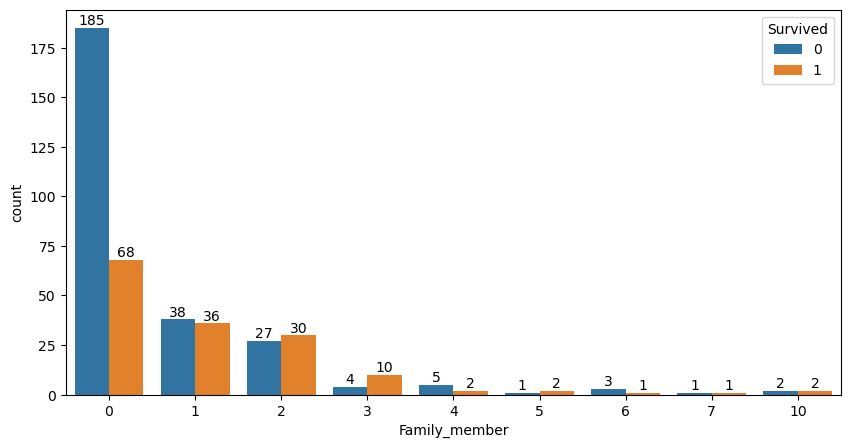

In [48]:
plt.figure(figsize=(10,5),dpi=100)
ax=sns.countplot(x='Family_member',hue='Survived',data=tnc1)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Embarked Column:

In [49]:
tnc1.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

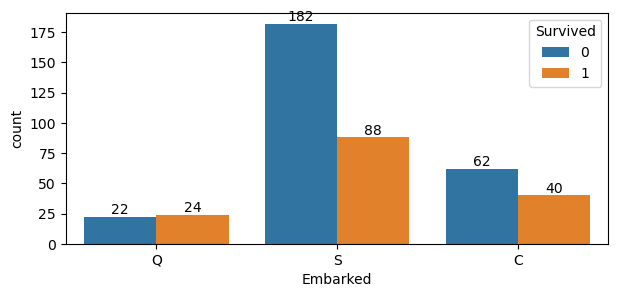

In [50]:
plt.figure(figsize=(7,3),dpi=100)
ax=sns.countplot(x='Embarked',hue='Survived',data=tnc1)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

* Let's leave Embarked Column for now.

## Correlation:

In [51]:
corr=tnc1.drop(['SibSp','Parch'],axis=1)
corr.head()

,Survived,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Family_member
0,0,3,"Kelly, Mr. James",34.5,330911,7.8292,NaN,Q,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,S,1,0,1
2,0,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,Q,0,1,0
3,0,3,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,S,0,1,0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,S,1,0,2


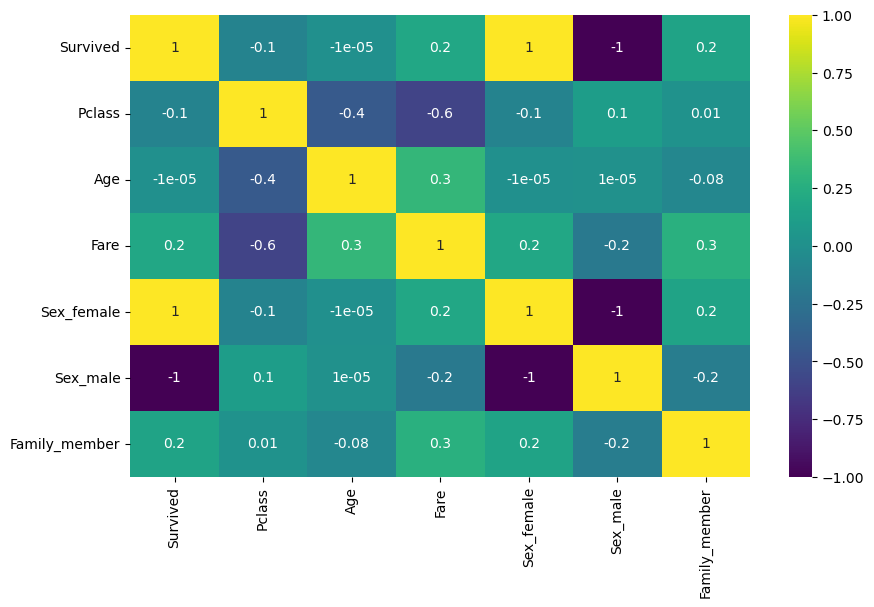

In [52]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(corr.corr(),annot=True,fmt='.1g',cmap='viridis')

plt.show()

## Modeling:

In [53]:
tnc1.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_female', 'Sex_male', 'Family_member'],
      dtype='object')

In [54]:
features=tnc1[['Pclass','Age','Fare','Sex_female','Sex_male','Family_member']]
target=tnc1.Survived

In [55]:
features.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Family_member
0,3,34.5,7.8292,0,1,0
1,3,47.0,7.0000,1,0,1
2,2,62.0,9.6875,0,1,0
3,3,27.0,8.6625,0,1,0
4,3,22.0,12.2875,1,0,2


In [56]:
target.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

## Train-Test Split:

In [57]:
## Let's Split the data into train and test:

from sklearn.model_selection import train_test_split
train_features,test_features,train_target,test_target=train_test_split(features,target,train_size=0.7,random_state=32)

In [58]:
train_features.shape,test_features.shape

((292, 6), (126, 6))

In [59]:
train_target.shape,test_target.shape

((292,), (126,))

In [60]:
train_features.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Family_member
118,1,36.0,75.2417,0,1,0
195,3,33.0,7.8542,0,1,0
345,3,16.0,7.6500,1,0,0
3,3,27.0,8.6625,0,1,0
385,2,24.0,65.0000,1,0,3


In [61]:
test_features.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Family_member
352,2,18.00000,73.5000,0,1,0
290,1,30.27259,39.6000,0,1,0
243,3,30.27259,7.8875,0,1,0
223,3,21.00000,7.7958,0,1,0
47,3,30.27259,7.7500,0,1,0


## Importing the models that we will use to fit the data into:

In [62]:
# Models to be used:

# Logistic Regression
# DecisionTree Classifier
# RandomForest Classifier
# GaussianNB Classifier

In [63]:
import warnings
warnings.filterwarnings('ignore') # Supressing Warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn import metrics

In [64]:
# We will use loop to predict survival for all the models at one execution

In [65]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
 
for i in range(4):
    models[i].fit(train_features,train_target)
 
    print(f'{models[i]} : ')
    print()
    print('Training Accuracy : ', metrics.accuracy_score(train_target,models[i].predict(train_features))*100)
    print('Testing Accuracy : ', metrics.accuracy_score(test_target,models[i].predict(test_features))*100)
    print('\nConfusion Matrix:\n')
    print(confusion_matrix(test_target,models[i].predict(test_features)))
    print('\nClassification Report:\n')
    print(classification_report(test_target,models[i].predict(test_features)))
    print('----------'*10)

LogisticRegression() : 

Training Accuracy :  100.0
Testing Accuracy :  100.0

Confusion Matrix:

[[82  0]
 [ 0 44]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

----------------------------------------------------------------------------------------------------
DecisionTreeClassifier() : 

Training Accuracy :  100.0
Testing Accuracy :  100.0

Confusion Matrix:

[[82  0]
 [ 0 44]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        44

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg

* Since The Survival rate of Passenger is directly related to the Sex of the passengers, we might be getting 100% accuracy in both training and test data.

## Let's experiment by dropping the Sex columns from the data:

In [66]:
features=tnc1[['Pclass','Age','Fare','Family_member']]
target=tnc1.Survived

In [67]:
## Let's Split the data into train and test:

from sklearn.model_selection import train_test_split
train_features,test_features,train_target,test_target=train_test_split(features,target,train_size=0.7,random_state=32)

## Prediction:

In [68]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]
 
for i in range(4):
    models[i].fit(train_features,train_target)
 
    print(f'{models[i]} : ')
    print()
    print('Training Accuracy : ', metrics.accuracy_score(train_target,models[i].predict(train_features))*100)
    print('Testing Accuracy : ', metrics.accuracy_score(test_target,models[i].predict(test_features))*100)
    print('\nConfusion Matrix:\n')
    print(confusion_matrix(test_target,models[i].predict(test_features)))
    print('\nClassification Report:\n')
    print(classification_report(test_target,models[i].predict(test_features)))
    print('----------'*10)

LogisticRegression() : 

Training Accuracy :  63.35616438356164
Testing Accuracy :  69.84126984126983

Confusion Matrix:

[[79  3]
 [35  9]]

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.96      0.81        82
           1       0.75      0.20      0.32        44

    accuracy                           0.70       126
   macro avg       0.72      0.58      0.56       126
weighted avg       0.71      0.70      0.64       126

----------------------------------------------------------------------------------------------------
DecisionTreeClassifier() : 

Training Accuracy :  96.23287671232876
Testing Accuracy :  56.34920634920635

Confusion Matrix:

[[50 32]
 [23 21]]

Classification Report:

              precision    recall  f1-score   support

           0       0.68      0.61      0.65        82
           1       0.40      0.48      0.43        44

    accuracy                           0.56       126
   macro avg      